# 5 A BIBLIOTECA GEOPANDAS

[Abrir no Google Colab](https://colab.research.google.com/github/Alexandrogschafer/Programacao-Geoprocessamento/blob/main/notebooks/capitulo5.ipynb)

Em um mundo cada vez mais orientado por dados, a capacidade de trabalhar com informações geoespaciais tornou-se fundamental em diversas áreas, desde o planejamento urbano até a ecologia e ciências ambientais. Neste contexto, a Geopandas emerge como uma importante ferramenta para a análise geoespacial em Python.

Geopandas é uma extensão da Pandas que introduz estruturas de dados espaciais. Ele apresenta duas estruturas de dados principais (figura 10): GeoSeries e GeoDataFrame. Uma GeoSeries é uma série em que cada entrada representa um conjunto geométrico. Por sua vez, um GeoDataFrame assemelha-se a um DataFrame padrão do Pandas, porém, inclui uma coluna especial denominada "geometry", responsável por armazenar informações geoespaciais.

![Figura 10](https://github.com/Alexandrogschafer/Programacao-Geoprocessamento/blob/gh-pages/notebooks/images/fig10.png?raw=1)

Figura 10: Estruturas de dados da Geopandas.
<br><br>

A Geopandas é capaz de lidar com uma variedade de tipos geométricos, abrangendo pontos, linhas, polígonos e combinações destes. Esta capacidade é complementada por uma série de operações espaciais, possíveis graças à integração com bibliotecas como Shapely e Fiona. Estas operações incluem, mas não se limitam a, interseção, união, diferença e buffer. Além disso, a biblioteca oferece ferramentas robustas para análise espacial, permitindo o cálculo de áreas, distâncias e outras métricas geométricas essenciais.

A flexibilidade da Geopandas não se restringe apenas às operações mencionadas. Ele pode ler e escrever em diversos formatos de dados espaciais, incluindo shapefile e GeoJSON. Além disso, suporta operações de projeção e transformações entre sistemas de coordenadas. Para os profissionais que trabalham com bancos de dados espaciais, a Geopandas também pode ser integrado ao PostGIS, facilitando operações avançadas e consultas SQL. Quando se trata de visualização, a biblioteca se integra perfeitamente a outras soluções Python, como Matplotlib, Plotly e Folium, oferecendo um vasto leque de opções para representação gráfica de dados geoespaciais.


## 5.1 Leitura de arquivos

A Geopandas tem a capacidade de simplificar a leitura de arquivos geoespaciais em Python, suportando uma variedade de formatos comuns na área de Geoprocessamento.

O método gpd.read_file é uma função da biblioteca Geopandas que permite ler diferentes formatos de arquivos de dados geoespaciais e convertê-los em um GeoDataFrame. Quando você utiliza o gpd.read_file, a Geopandas faz uso da biblioteca Fiona internamente para ler o arquivo. Isso significa que ele pode lidar com uma variedade de formatos de arquivo, incluindo Shapefiles (.shp), GeoJSON, GPKG, entre outros.
<br><br>

*Lendo Shapefiles com Geopandas*

Inicialmente vamos importar as bibliotecas pandas e geopandas, que utilizaremos ao longo deste capítulo:

In [ ]:
import pandas as pd
import geopandas as gpd

Vamos acessar os arquivos diretamente do Google Drive. Para tanto, vamos aplicar o seguinte código:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Carregar o Shapefile em um GeoDataFrame:

In [ ]:
gdf = gpd.read_file('/content/drive/MyDrive/files/cap5/f4/BR_UF.shp')

Mostrar as primeiras linhas do GeoDataFrame:

In [ ]:
gdf.head()

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,AREA_KM2,geometry
0,12,Acre,AC,Norte,164173.429,"POLYGON ((-68.79282 -10.99957, -68.79367 -10.9..."
1,13,Amazonas,AM,Norte,1559255.881,"POLYGON ((-56.76292 -3.23221, -56.76789 -3.242..."
2,15,Pará,PA,Norte,1245870.704,"MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ..."
3,16,Amapá,AP,Norte,142470.762,"MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ..."
4,17,Tocantins,TO,Norte,277423.627,"POLYGON ((-48.24830 -13.19239, -48.24844 -13.1..."


Após ler o arquivo, ele é armazenado no GeoDataFrame gdf; gdf.head() imprime as primeiras cinco linhas do GeoDataFrame gdf usando o método head(). Desta maneira podemos ter uma visão rápida dos dados e verificar se tudo foi carregado e convertido corretamente.
<br><br>

*Observações:*

- Dependências: A Geopandas depende de várias outras bibliotecas, como Fiona (para leitura/escrita de arquivos) e Shapely (para operações geométricas). Ao instalar a Geopandas via pip, estas dependências também serão instaladas.

- Projeção: Muitas vezes, é uma boa prática verificar a projeção do Shapefile depois de carregá-lo, especialmente se você planeja combinar dados de várias fontes. Você pode fazer isso usando gdf.crs:

In [ ]:
print(gdf.crs)

EPSG:4674


<br><br>

*Plotando GeoDataFrames com Geopandas*

A Geopandas permite a visualização de GeoDataFrames, facilitando a visualização das geometrias no espaço geográfico. Para exibir a geometria ativa, utilize o método GeoDataFrame.plot().

<Axes: >

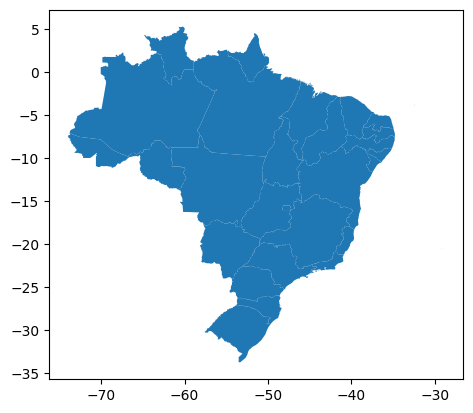

In [ ]:
gdf.plot()

No exemplo a seguir, exibimos a coluna de geometria ativa e usamos a coluna "NM_REGIAO" para determinar as cores por regiões do Brasil. Além disso, optamos por exibir uma legenda usando legend=True.

In [ ]:
gdf.plot('NM_REGIAO', legend=True)

Essa é uma breve apresentação do método GeoDataFrame.plot() para possibilitar a visualização dos GeoDataFrames ao longo do estudo da Geopandas. Após estudar a Geopandas, teremos uma seção sobre visualização de dados geoespaciais.
<br><br>

*Lendo dados com Geopandas – outros arquivos*

- GeoJSON

Como vimos anteriormente, o GeoJSON é um formato baseado em JSON para codificar estruturas geográficas. Para ler um arquivo GeoJSON:

In [ ]:
gdf_cap = gpd.read_file('/content/drive/MyDrive/files/cap5/f5/capitais_br.geojson')
gdf_cap.head()

In [ ]:
gdf_cap.plot()

É possível visualizar geometricamente os dados de dois GeoDataFrame da Geopandas em um único gráfico. Por enquanto, vamos apenas aplicar o script para gerar a visualização. Estudaremos o método plot() mais adiante.

In [ ]:
ax = gdf['geometry'].plot(color='gray')
gdf_cap['geometry'].plot(ax=ax, color='black')

- GPKG (GeoPackage)

GeoPackage é um formato de banco de dados aberto e padrão que pode conter múltiplas camadas. Você pode listar e selecionar camadas específicas:

In [ ]:
gdf_rod = gpd.read_file('/content/drive/MyDrive/files/cap5/f6/malha_transporte.gpkg', layer='trecho_rodoviario')
gdf_fer = gpd.read_file('/content/drive/MyDrive/files/cap5/f6/malha_transporte.gpkg', layer='trecho_ferroviario')

No código acima, em layer='trecho_rodoviario', o argumento layer especifica a camada ou tabela dentro do Geopackage que desejamos ler. Em um Geopackage, você pode ter várias camadas (ou tabelas) diferentes, e essa especificação permite que você selecione qual delas deseja carregar. Neste caso, estamos escolhendo a camada chamada trecho_rodoviario.

No código seguinte, especificamos o layer ‘trecho_ferroviario’. Vamos visualizar os GeoDataFrames criados:

In [ ]:
gdf_rod.plot()

In [ ]:
gdf_fer.plot()

<br><br>

*CSV com Coordenadas: Convertendo dados tabulares em dados geoespaciais*

Caso tenhamos um arquivo CSV com colunas de latitude e longitude, primeiro podemos ler o arquivo com a Pandas e depois converter o DataFrame para um GeoDataFrame.

In [ ]:
from shapely.geometry import Point
df = pd.read_csv('/content/drive/MyDrive/files/cap5/f7/capitais_brasil.csv')
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy
    (df.longitude, df.latitude))
gdf.head()

O código acima lê um arquivo CSV contendo informações sobre as capitais brasileiras (incluindo suas coordenadas de longitude e latitude), converte essas coordenadas em pontos geoespaciais e armazena tudo em um GeoDataFrame. O parâmetro geometry é usado para definir a coluna de geometria do GeoDataFrame. A função gpd.points_from_xy(df.longitude, df.latitude) é usada para criar pontos a partir das colunas longitude e latitude do DataFrame df. Por fim, as primeiras cinco linhas desse GeoDataFrame são impressas para visualização.
<br><br>

*Leitura Seletiva de Dados*

Se um arquivo geoespacial contiver um grande volume de dados, pode ser útil ler apenas uma subseção ou uma amostra dos dados. Você pode fazer isso usando os argumentos rows ou bbox no método read_file.

a) Argumento rows

Ler apenas as primeiras 10 linhas

In [ ]:
gdf = gpd.read_file('/content/drive/MyDrive/files/cap5/f4/BR_UF.shp', rows=10)
gdf.plot()

No código acima, serão lidas apenas as primeiras dez linhas do arquivo shapefile.


b) Argumento bbox (bounding box)

Uma bounding box (ou retângulo envolvente) refere-se ao retângulo de dimensões mínimas que envolve um conjunto geométrico, definido pelos cantos inferior esquerdo e superior direito. Cada ponto é definido por uma coordenada de longitude e latitude. Esse retângulo frequentemente é usado para operações rápidas de verificação espacial, pois trabalhar com um retângulo é computacionalmente mais simples do que com formas geométricas mais complexas.


Exemplo: Vamos ler o arquivo shapefile BR_UF novamente, mas agora especificando uma bounding box.


Ler dados dentro de uma bounding box específica (minx, miny, maxx, maxy):

In [ ]:
bbox = [-53.8, -29.4, -48.3, -25.8]
gdf = gpd.read_file('/content/drive/MyDrive/files/cap5/f4/BR_UF.shp', bbox=bbox)
gdf.plot()

<br><br>

*Conversão de Projeção durante a Leitura*

É possível reprojetar dados durante a leitura aplicando o método to_crs(), economizando um passo posterior de transformação. Por exemplo, para reprojetar dados de qualquer EPSG para o EPSG: 4674:

```
gdf = gpd.read_file('caminho_do_arquivo.shp').to_crs(epsg=4674)
```
<br><br>

*Lendo com Codificação Específica*

Ao trabalhar com dados geoespaciais, especialmente dados de diferentes fontes ou regiões, pode ser necessário experimentar ou verificar a documentação para determinar a codificação correta. Algumas codificações comuns incluem (quadro 10):

Quadro 10: Codificações e suas descrições.


| Codificação   | Descrição                                                                                                                                                   |
|---------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------|
| UTF-8         | Codificação Unicode popular que pode representar qualquer caractere no conjunto de caracteres Unicode. É a codificação padrão para muitos formatos de arquivo e é amplamente usada em aplicações web. |
| ISO-8859-1    | Codificação de um único byte que pode representar os primeiros 256 pontos de código Unicode. É comum em dados de países ocidentais. Também conhecido como Latin1. |
| CP1252        | Uma codificação de página de código usada pelo Windows em inglês e em algumas outras línguas ocidentais.                                                     |
| ISO-8859-15   | Semelhante ao ISO-8859-1, mas inclui alguns caracteres adicionais, como o euro (€).                                                                          |

Vamos ler novamente o arquivo 'capitais_brasil.csv', especificando a codificação (parâmetro encoding) UTF-8:

In [ ]:
gdf = gpd.read_file('/content/drive/MyDrive/files/cap5/f7/capitais_brasil.csv', encoding='UTF-8')
gdf

<br><br>

*Lendo dados não espaciais (tabulares)*

A Geopandas é projetado para lidar com dados geoespaciais, mas, dado que é uma extensão do Pandas, também pode manipular dados tabulares (não espaciais). No entanto, para dados puramente tabulares, é mais comum e direto usar o Pandas.



## 5.2 Criando geometrias na Geopandas

Na Geopandas, além de manipular e analisar dados geoespaciais, você também pode criar geometrias. Como vimos anteriormente, a biblioteca Shapely (que é uma dependência da Geopandas) fornece as ferramentas para criar e manipular geometrias. A Geopandas integra essas ferramentas para facilitar a criação e manipulação de geometrias dentro de seus GeoDataFrames e GeoSeries. Vamos estudar algumas funções e métodos para criar geometrias na Geopandas:
<br><br>

a) A partir de dados:

Se você tiver dados em um DataFrame da Pandas e quiser convertê-los em um GeoDataFrame com geometrias, pode usar a função Geopandas.GeoDataFrame.

In [ ]:
df = pd.DataFrame({'longitude': [-67.8270, -40.2976, -54.6156],
    'latitude': [-9.97499, -20.3195, -20.4428]})

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf

A primeira linha desse código cria um DataFrame da Pandas chamado df, com base em um dicionário de dados. O dicionário tem duas chaves: 'longitude' e 'latitude'. Cada chave está associada a uma lista de valores.

A segunda linha do código converte o DataFrame df em um GeoDataFrame gdf, adicionando informações geométricas (neste caso, pontos) a partir de duas colunas do DataFrame original que representam coordenadas de longitude e latitude. gpd.points_from_xy(df.longitude, df.latitude), points_from_xy cria uma série de objetos geométricos do tipo "ponto" a partir de duas sequências de valores: a primeira para as coordenadas X (longitudes) e a segunda para as coordenadas Y (latitudes). Assim, ela transforma pares de valores de longitude e latitude em pontos geométricos.

Em gpd.GeoDataFrame(df, geometry=...) criamos um novo GeoDataFrame a partir do DataFrame original df. O parâmetro geometry é usado para especificar qual coluna do GeoDataFrame deve ser tratada como a coluna de geometria. Ao fornecer a série de pontos criada no passo anterior como valor para o argumento geometry, estamos efetivamente adicionando uma nova coluna ao DataFrame original que armazenará as informações geométricas.


Para criar um shapefile com atributos e geometrias, a partir de um dicionário:

In [ ]:
# Definição do dicionário
capitais = {
    'Rio Branco': ('Acre', (-67.8270, -9.97499)),
    'Vitória': ('Espírito Santo', (-40.2976, -20.3195)),
    'Campo Grande': ('Mato Grosso do Sul', (-54.6156, -20.4428)),
    'João Pessoa': ('Paraíba', (-34.8761, -7.11509)),
    'Porto Alegre': ('Rio Grande do Sul', (-51.2167, -30.0277))
}

Um dicionário chamado capitais é definido. As chaves desse dicionário são nomes de capitais de alguns estados brasileiros. Cada valor associado a uma capital é uma tupla contendo o nome do estado e outra tupla com as coordenadas geográficas (longitude e latitude) da capital.

O objetivo das próximas linhas de código é extrair informações separadas do dicionário capitais e armazená-las em listas individuais.

Convertendo o dicionário em listas separadas

In [ ]:
nomes = list(capitais.keys())
estados = [capitais[capital][0] for capital in nomes]
longitudes = [capitais[capital][1][0] for capital in nomes]
latitudes = [capitais[capital][1][1] for capital in nomes]

No código acima:

- nomes = list(capitais.keys()) extrai os nomes das capitais (que são as chaves do dicionário) e os armazena em uma lista chamada nomes;

- estados = ``` [capitais[capital][0] for capital in nomes] ``` é uma list comprehension que itera sobre cada capital na lista nomes e extrai o nome do estado associado (que é o primeiro elemento da tupla associada a cada capital no dicionário). O resultado é armazenado na lista estados.;

- longitudes = ``` [capitais[capital][1][0] ``` for capital in nomes] extrai a longitude de cada capital (que é o primeiro elemento da segunda tupla associada a cada capital) e armazena os valores na lista longitudes.

- latitudes = ``` [capitais[capital][1][1] for capital in nomes] ``` extrai a latitude de cada capital (que é o segundo elemento da segunda tupla associada a cada capital) e armazena os valores na lista latitudes.
<br><br>

O trecho de código abaixo cria um GeoDataFrame a partir das listas nomes, estados, longitudes e latitudes que foram previamente extraídas do dicionário capitais:

In [ ]:
gdf = gpd.GeoDataFrame({
    'capital': nomes,
    'estado': estados,
    'geometry': [Point(xy) for xy in zip(longitudes, latitudes)]
})
gdf.head()

Nesse trecho:

- ``` gpd.GeoDataFrame()```  cria um novo GeoDataFrame chamado gdf;

- ``` 'capital': nomes ``` e ``` 'estado': estados ``` são colunas que armazenam os nomes das capitais e dos estados, respectivamente, usando as listas nomes e estados;

- ``` 'geometry': [Point(xy) for xy in zip(longitudes, latitudes)] ``` é a coluna de geometria do GeoDataFrame. A compreensão de lista dentro dessa linha cria uma lista de objetos Point a partir das listas longitudes e latitudes. A função zip() é usada para emparelhar cada longitude com sua latitude correspondente, e cada par é passado para o construtor Point() para criar um objeto geométrico do tipo ponto.
<br><br>

Vamos verificar se as geometrias criadas estão em algum CRS:

In [ ]:
crs=gdf.crs
print(crs)

As geometrias não tem nenhum CRS especificado. Vamos atribuir o CRS SIRGAS 2000 ao nosso GeoDataFrame.

In [ ]:
gdf.crs = 'EPSG:4674'

Vamos consultar novamente o CRS:

In [ ]:
crs=gdf.crs
print(crs)

<br><br>

*A partir de WKT (Well-Known Text)*

O formato WKT, que significa Well-Known Text, é uma representação textual padrão para geometrias espaciais. Ele é usado para transmitir informações sobre objetos geométricos - como pontos, linhas e polígonos - de uma maneira legível por humanos e máquina.

O formato WKT é útil porque fornece uma maneira padrão e concisa de representar geometrias. Isso facilita a troca, armazenamento e análise de dados geoespaciais em diferentes sistemas e plataformas. Muitas ferramentas e bibliotecas geoespaciais, como PostGIS, QGIS, Shapely e Geopandas, suportam a leitura e escrita de geometrias no formato WKT.

Para criar um GeoDataFrame a partir de um WKT:

In [ ]:
from shapely.geometry import GeometryCollection, Point, LineString

geom_collection = GeometryCollection([
    Point(40, 10),
    LineString([(10, 10), (20, 20), (10, 40)])
])

# Criar uma lista com as geometrias usando a propriedade 'geoms'
geometrias = [geom for geom in geom_collection.geoms]

# Criar um GeoDataFrame a partir das geometrias
gdf_wkt = gpd.GeoDataFrame(geometry=geometrias)

print(gdf_wkt)

In [ ]:
gdf_wkt.plot()

<br><br>

*Escrevendo um GeoDataFrame para um arquivo no disco*

Escrever um GeoDataFrame em um arquivo ou banco de dados é uma operação corriqueira ao trabalhar com dados geoespaciais na Geopandas. Aqui estão algumas das opções mais comuns:


Escrever em Shapefile:

In [ ]:
# gdf.to_file('capitais.shp')

Escrever em GeoJSON:

In [ ]:
gdf.to_file('files_out/capitais.geojson', driver='GeoJSON')


Escrever em GeoPackage (GPKG):

In [ ]:
gdf.to_file('capitais.gpkg', driver='GPKG')

## 5.3 Funções apply, map e replace no contexto da Geopandas

### 5.3.1 A função apply na Geopandas

A função apply é uma herança da Pandas que permite aplicar uma determinada função a todos os elementos de uma coluna ou linha em um DataFrame ou GeoDataFrame. Na Geopandas, essa função é comumente utilizada para realizar operações específicas em cada uma das geometrias de um conjunto de dados geoespacial. Vamos entender melhor com alguns exemplos.
<br><br>

Exemplo 1: Calcular o comprimento dos rios apresentados na figura 11, localizados no estado do Maranhão.


![Figura 11](https://github.com/Alexandrogschafer/Programacao-Geoprocessamento/blob/gh-pages/notebooks/images/fig11.png?raw=1)

Figura 11: Rios no estado do Maranhão.
<br><br>


Etapa 1: Leitura do shapefile e edição do GeoDataFrame:

In [ ]:
gdf_rios = gpd.read_file('/content/drive/MyDrive/files/cap5/f8/rios_maranhao.shp')
gdf_rios = gdf_rios.rename(columns={'NORIOCOMP': 'nome'})
gdf_rios = gdf_rios.drop(columns=['FID_GEOFT_',
    'CORIO', 'FID_BR_UF_', 'CD_UF', 'NM_UF', 'SIGLA_UF',
    'NM_REGIAO', 'AREA_KM2', 'Shape_Leng'])
gdf_rios

Vamos plotar o GeoDataFrame:

In [ ]:
gdf_rios.plot()

Etapa 2: Cálculo do comprimento de cada rio e armazenamento dos resultados na nova coluna 'comprimento':

In [ ]:
gdf_rios['comprimento'] = gdf_rios['geometry'].apply(lambda geom: geom.length)/1e3

Nesse código, utilizamos o método apply() para aplicar uma função a cada valor na coluna geometry do GeoDataFrame chamado gdf_rios. A função é uma função lambda que pega um argumento geom (que representa uma geometria individual da coluna geometry) e retorna o comprimento dessa geometria usando o método length. Em seguida, dividimos todos os comprimentos por '1e3'(que é igual a 1000). Isso é feito para converter os comprimentos de metros para quilômetros. Vamos verificar o GeoDataFrame após a aplicação do código:

In [ ]:
print (gdf_rios)

Podemos verificar que foi criada a coluna "comprimento" e o comprimento de cada rio foi calculado utilizando o método "length". Vamos criar uma consulta que retorne apenas o nome e o comprimento de cada rio:

In [ ]:
print (gdf_rios[['nome', 'comprimento']])

<br><br>

Exemplo 2: Inserir uma nova coluna no GeoDataFrame, cujo registro é o nome no rio e a sigla do estado. Por exemplo, Rio Pindaré MA.

Para processar ou transformar cada linha de um GeoDataFrame individualmente, utiliza-se a função apply com o argumento axis=1.

In [ ]:
gdf_rios['UF'] = 'MA'
gdf_rios['nome_UF'] = gdf_rios.apply(lambda row: row['nome'] + ' ' + row['UF'], axis=1)
gdf_rios = gdf_rios.drop(columns=['nome', 'UF'])

No código acima, criamos a coluna ‘UF’ com o valor padrão ‘MA’, referente ao estado do Maranhão. Em seguida, aplicamos o apply com uma função lambda a cada linha (axis=1). A expressão da função lambda é ``` row['nome'] + ' ' + row['UF']. ``` Aqui, para cada linha do GeoDataFrame, estamos concatenando o valor na coluna 'nome' com o valor na coluna 'UF', separados por um espaço. O resultado dessa concatenação é então atribuído à nova coluna 'nome_UF' para cada linha do GeoDataFrame. Por fim, deletamos as colunas ‘nome’ e ‘UF’.

In [ ]:
print (gdf_rios[['nome_UF', 'comprimento']])

<br><br>


Exemplo 3: Criar um buffer de 30 metros em torno de cada rio que consta na figura 12.

In [ ]:
gdf_rios['buffer_app'] = gdf_rios['geometry'].apply(lambda geom: geom.buffer(30))

Nesse código utilizamos o método apply() para aplicar uma função a cada valor na coluna geometry. A função lambda pega um argumento geom (que representa uma geometria individual da coluna geometry) e aplica o método buffer(30) a ele. O método buffer(30) é um método da Shapely que cria um buffer (ou zona de influência) ao redor da geometria. Neste caso, o buffer terá uma distância de 30 metros a partir da geometria original.


Na figura 12, temos uma visualização parcial das linhas originadas pela aplicação do buffer no Rio Grajaú.

![Figura 12](https://github.com/Alexandrogschafer/Programacao-Geoprocessamento/blob/gh-pages/notebooks/images/fig12.png?raw=1)

Figura 12: Buffer de 30 metros ao longo do rio Grajaú.
<br><br>

Exemplo 4: Classificar os rios existentes no DataFrame em ‘pequeno’, ‘médio’ e ‘grande’.
Além de funções lambda, é possível criar as suas próprias funções e usá-las com apply.  Nesse exemplo, vamos criar a função ‘categoriza_comp’:

In [ ]:
def categoriza_comp(row):
    if row.geometry.length < 300000:
        return 'pequeno'
    elif row.geometry.length < 600000:
        return 'médio'
    else:
        return 'grande'

Essa função aceita um argumento chamado row, que é uma linha do GeoDataFrame. A linha if row.geometry.length < 300000: verifica se o comprimento da geometria da linha atual é menor que 300.000 metros. Se a condição for verdadeira, a função retorna "pequeno".
A linha elif row.geometry.length < 600000: é avaliada se a primeira condição não for verdadeira. Verifica se o comprimento da geometria da linha atual é menor que 600.000 metros. Se essa condição for verdadeira, a função retorna "médio". Se nenhuma das condições acima for verdadeira, a função retorna "grande". As classes para essa função foram definidas aleatoriamente, sem uma base teórica, apenas para apresentar esse exemplo.

In [ ]:
gdf_rios['categoria_comp'] = gdf_rios.apply(categoriza_comp, axis=1)

No código acima, utilizamos o método apply() para aplicar a função categoriza_comp a cada linha do GeoDataFrame. O argumento axis=1 indica que a função será aplicada a cada linha.

In [ ]:
print(gdf_rios[['nome_UF', 'categoria_comp']])

### 5.3.2 As funções map e replace na Geopandas

Na Geopandas, assim como no Pandas, as funções map e replace oferecem meios distintos de transformar valores em uma coluna.
A função map é usada para substituir cada valor por outro valor, que pode ser derivado de uma função, dicionário ou uma Series. É particularmente útil quando se deseja realizar uma transformação elementar com base em um conjunto predefinido de correspondências. Por exemplo, se estiver trabalhando com um dicionário, você pode mapear códigos de estados para seus respectivos nomes completos. Contudo, é importante notar que a função map opera apenas sobre Series, e não sobre DataFrames inteiros.

Por outro lado, a função replace é mais geral e flexível. Ela permite substituir um valor por outro em um DataFrame ou Series. A substituição pode ter como base valores individuais ou listas de valores. Por exemplo, você pode usar replace para substituir todos os valores nulos ou específicos em um DataFrame por um valor padrão. Diferente do map, o replace não limita a substituição com base em um mapeamento direto, oferecendo uma abordagem mais abrangente para transformações.
<br><br>

Exemplo: Temos um arquivo shapefile com os municípios dos estados de Goiás, Mato Grosso e Mato Grosso do Sul (figura 13). No total, são 466 municípios. A identificação do estado a que cada município pertence se dá pela coluna SIGLA_UF, que armazena a sigla de cada estado. Queremos alterar a identificação dos estados de Goiás e Mato Grosso para os seus nomes ao invés das siglas, mas manter Mato Grosso do Sul identificado pela sua sigla. Vamos realizar essa operação usando tanto a função map quanto a função replace para compará-las.


![Figura 13](https://github.com/Alexandrogschafer/Programacao-Geoprocessamento/blob/gh-pages/notebooks/images/fig13.jpg?raw=1)

Figura 13: Municípios dos estados de Goiás, Mato Grosso e Mato Grosso do Sul.
<br><br>

*Utilizando a função map*

Inicialmente, criamos um GeoDataFrame a partir do arquivo shapefile mun_MT_MS_GO.shp.

In [ ]:
gdf_co = gpd.read_file ('/content/drive/MyDrive/files/cap5/f9/mun_MT_MS_GO.shp')
gdf_co

Podemos verificar que os estados estão identificados por suas siglas: GO, MS e MT. vamos plotar o GeoDataFrame:

In [ ]:
gdf_co.plot()

Vamos agora criar um dicionário chamado mapeamento (ele será útil em nossos próximos códigos). Neste dicionário, as siglas dos estados (como 'GO' e 'MT') são usadas como chaves, e os nomes completos dos estados (como 'Goiás' e 'Mato Grosso') são os valores correspondentes. Em termos práticos, isso significa que, se você acessar o valor associado à chave 'GO' no dicionário mapeamento, obterá 'Goiás'. Da mesma forma, se acessar o valor associado à chave 'MT', obterá 'Mato Grosso'.

In [ ]:
mapeamento = {'GO': 'Goiás', 'MT': 'Mato Grosso'}

Agora vamos aplicar a função map à coluna 'SIGLA_UF':

In [ ]:
gdf_map = gdf_co
gdf_map['SIGLA_UF'] = gdf_map['SIGLA_UF'].map(mapeamento)

O que a função "map" faz é mapear os valores desta coluna usando o dicionário mapeamento. Se um valor da coluna 'SIGLA_UF' corresponder a uma chave do dicionário, ele será substituído pelo valor associado no dicionário. Qualquer valor na coluna 'SIGLA_UF' que não estiver no dicionário mapeamento será convertido para NaN (ou seja, considerado como valor ausente).

In [ ]:
gdf_map

<br><br>

*Usando a função replace*

Vamos carregar novamente o arquivo shapefile e convertê-lo em um GeoDataFrame:

In [ ]:
gdf_co = gpd.read_file ('/content/drive/MyDrive/files/cap5/f9/mun_MT_MS_GO.shp')
gdf_co

Agora vamos aplicar a função "replace" na mesma coluna, 'SIGLA_UF', do GeoDataFrame gdf_rep:

In [ ]:
gdf_rep = gdf_co
gdf_rep['SIGLA_UF'] = gdf_rep['SIGLA_UF'].replace(mapeamento)

Semelhante à função map, a função replace substituirá os valores da coluna com base no dicionário mapeamento. No entanto, a diferença fundamental é que, com replace, se um valor da coluna 'SIGLA_UF' não estiver no dicionário mapeamento, ele permanecerá inalterado. Ou seja, replace não converte valores não mapeados para NaN.


Em resumo, enquanto tanto a função map quanto a função replace podem ser usadas para transformar valores com base em um dicionário de mapeamento, a função map irá converter valores não mapeados para NaN, enquanto a função replace deixará valores não mapeados inalterados.


## 5.4 Combinando DataFrames e GeoDataFrames

No âmbito da análise de dados geoespaciais, a combinação de DataFrames e GeoDataFrames é uma prática essencial para integrar e manipular informações de diferentes fontes. As ferramentas concat e merge, disponíveis em bibliotecas como pandas e geopandas, são amplamente utilizadas neste processo. Enquanto concat é utilizado para empilhar DataFrames verticalmente ou horizontalmente, respeitando o mesmo conjunto de colunas, a função merge é empregada para unir DataFrames com base em colunas específicas, similar a uma operação de junção em bancos de dados. Para melhor compreensão, exploraremos a aplicação dessas funções em detalhes utilizando dados reais a seguir.


### 5.4.1 Anexação: Método concat

Exemplo: Temos cinco arquivos shapefile, um de cada região do Brasil (figura 14). Queremos criar um GeoDataFrame de todo o país.

![Figura 14](https://github.com/Alexandrogschafer/Programacao-Geoprocessamento/blob/gh-pages/notebooks/images/fig14.png?raw=1)

Figura 14: Regiões do Brasil.
<br><br>

Inicialmente, valos criar os GeoDataFrames de cada região a partir dos arquivos shapefile:

In [ ]:
gdf_norte = gpd.read_file('content/drive/MyDrive/files/cap5/f10/norte.shp')
gdf_sul = gpd.read_file('content/drive/MyDrive/files/cap5/f10/sul.shp')
gdf_nordeste = gpd.read_file('content/drive/MyDrive/files/cap5/f10/nordeste.shp')
gdf_sudeste = gpd.read_file('content/drive/MyDrive/files/cap5/f10/sudeste.shp')
gdf_centro_oeste = gpd.read_file('/content/drive/MyDrive/files/cap5/f10/centro_oeste.shp.shp')

Vamos plotar cada GeoDataFrame.

Região norte:

In [ ]:
gdf_norte.plot()

Região nordeste:

In [ ]:
gdf_nordeste.plot()

Região centro oeste:

In [ ]:
gdf_centro_oeste.plot()

Região sudeste:

In [ ]:
gdf_sudeste.plot()

Região sul:

In [ ]:
gdf_sul.plot()

Em seguida, concatenamos todos os GeoDataFrames criados:

In [ ]:
gdf_brasil = pd.concat([gdf_norte, gdf_sul, gdf_nordeste,
    gdf_sudeste, gdf_centro_oeste], ignore_index=True)
gdf_brasil.head()

E plotamos o GeoDataFrame resultante:

In [ ]:
gdf_brasil.plot()

### 5.4.2 Junções de Atributos (Attribute Joins)

Junções de atributos referem-se ao processo de combinar tabelas com base em valores de colunas comuns. Em termos de conjuntos de dados geoespaciais, isso significa que você pode combinar informações de diferentes fontes com base em um identificador comum, como um ID ou nome, sem considerar a localização geográfica. Esse tipo de junção é semelhante às junções realizadas em bancos de dados relacionais.
Inicialmente vamos importar as bibliotecas: Pandas (para manipulação de dados tabulares) e Geopandas (para manipulação de dados geoespaciais). Em seguida, vamos ler os dados e criar os DataFrames.

In [ ]:
gdf_cap = gpd.read_file('/content/drive/MyDrive/files/cap5/f11/capitais_br.shp')
df_censo_cap = pd.read_excel('/content/drive/MyDrive/files/cap5/f12/censo_capitais.xlsx')
df_censo_cap.head()

In [ ]:
gdf_cap.head()

In [ ]:
gdf_cap.plot()

Agora vamos renomear as colunas do DataFrame df_censo_cap para torná-las mais descritivas:

In [ ]:
#Alterar o nome das colunas do df_censo_cap
df_censo_cap = df_censo_cap.rename(columns={
    2000: 'pop2000',
    2010: 'pop2010',
    2022: 'pop2022'
})
df_censo_cap.head()

Podemos verificar que a alteração foi realizada corretamente.

Vamos agora combinar gdf_cap e df_censo_cap com base na coluna codigo. A junção é do tipo "inner", o que significa que apenas as linhas com códigos correspondentes em ambos os DataFrames serão inclusos no resultado.


Junção dos dataframes usando as colunas 'capital' e 'Capital'

In [ ]:
gdf_censo_cap = gdf_cap.merge(df_censo_cap, left_on='codigo', right_on='codigo', how='inner')
gdf_censo_cap.head()

Nesse código, o método merge é usado para combinar DataFrames com base em colunas ou índices comuns. O parâmetro on=’codigo' especifica que a combinação deve ser feita com base na coluna codigo. Em outras palavras, para cada linha em gdf_cap que tenha uma determinada sigla na coluna codigo, o método procurará por linhas em df_censo_cap que tenham a mesma sigla e combinará as informações.

O parâmetro how='left' define o tipo de junção a ser realizado. O valor 'left' significa que a junção é do tipo "left join", ou seja, todas as linhas do gdf_cap serão mantidas. Caso não haja correspondência em df_censo_cap, os valores resultantes para as colunas de df_censo_cap serão NaN (valores faltantes).

Após a junção, temos duas colunas que representam a capital (uma de cada DataFrame):


Vamos remover a coluna 'Capital' duplicada após a junção:

In [ ]:
gdf_censo_cap = gdf_censo_cap.drop(columns=['Capital'])
gdf_censo_cap.head()

## 5.5 Seleção e filtragem de dados

### 5.5.1 Seleção com base em atributos

Na Geopandas, a seleção com base em atributos refere-se ao processo de filtrar dados em um GeoDataFrame com base nos valores das colunas, similarmente ao que fazemos com o Pandas. Esse tipo de seleção permite que os usuários isolem subconjuntos específicos de dados com base em critérios definidos, como características geográficas, demográficas ou qualquer outro atributo tabular. Para exemplificar a seleção por atributos, vamos realizar algumas operações para criar um GeoDataFrame com os dados do PIB estadual de 2020 e dos Censos de 2000, 2010 e 2022 a partir de dado s que estão em planilhas do Excel.

Ler o arquivo shapefile:

In [ ]:
gdf = gpd.read_file('/content/drive/MyDrive/files/cap5/f4/BR_UF.shp')
gdf.head()

Ler o arquivo Excel com dados do PIB estadual:

In [ ]:
dfpib = pd.read_excel('/content/drive/MyDrive/files/cap5/f13/pibUfBr2020.xlsx')
dfpib.head()

Ler o arquivo Excel com dados do Censo de 2000, 2010 e 2022:

In [ ]:
dfcenso = pd.read_excel('/content/drive/MyDrive/files/cap5/f14/censo_UF.xlsx')
dfcenso.head()

Unir os dataframes dfpib e dfcenso:

In [ ]:
df_uf = pd.merge(dfpib, dfcenso, on='SIGLA_UF').drop(columns='UF_y').rename(columns={'UF_x': 'UF'})
df_uf.head()

Unir o dataframe df_uf com o geodataframe gdf:

In [ ]:
gdf_uf_cp = gdf.merge(df_uf, on='SIGLA_UF').drop(columns=['NM_UF', 'NM_REGIAO'])
gdf_uf_cp.head()

<br><br>

*Selecionar uma única coluna*

Sintaxe básica:

``` gdf['nome_da_coluna'] ```

ou

``` gdf.nome_da_coluna ```


Exemplo: Selecionar a coluna ‘UF’, que armazena o nome dos estados brasileiros:

In [ ]:
estados=gdf_uf_cp['UF']
print(estados)

Quando selecionamos apenas uma coluna, retorna uma Series.


Ao trabalhar com Geopandas, lembre-se de que se você remover a coluna "geometry", o DataFrame (ou Series) resultante perderá sua natureza espacial e se tornará um DataFrame comum ou uma Series do Pandas.
<br><br>

*Selecionar Múltiplas Colunas*

Sintaxe básica:

``` gdf[['coluna1', 'coluna2', 'coluna3']] ```

Exemplo: selecionar as colunas UF, PIB_2020, Popul_2022 e geometry do GeoDataFrame

In [ ]:
gdf_selecao = gdf_uf_cp[['UF', 'PIB_2020', 'Popul_2022', 'geometry']]
gdf_selecao.head()

<br><br>

*Descartar Colunas*

Ao invés de selecionar colunas específicas, você também pode descartar colunas que não deseja:

In [ ]:
gdf_drop = gdf_uf_cp.drop(columns=['CD_UF', 'AREA_KM2'])
gdf_drop.head()

<br><br>

#### 5.5.1.1 Seleção com base em Condições

A seleção baseada em condições é uma técnica comum ao trabalhar com DataFrames na Pandas e Geopandas. Ela permite filtrar linhas de um DataFrame com base em critérios específicos definidos por uma ou mais condições. Essa técnica é especialmente útil para análises exploratórias, pré-processamento de dados e muitas outras operações de manipulação de dados.

Sintaxe Básica: A seleção baseada em condições é realizada usando uma expressão booleana dentro de colchetes. Por exemplo:

```  gdf[gdf['coluna'] > 10] ```


Exemplo 1: Criar o GeoDataFrame pop_menor_1M, com os estados brasileiros com população menor do que 1 milhão de habitantes em 2022:

In [ ]:
consulta1 = gdf_uf_cp[gdf_uf_cp['Popul_2022'] < 1000000]
consulta1.head()

In [ ]:
consulta1.plot()

Exemplo 2: Criar o GeoDataFrame pop_maior_20M, com os estados brasileiros cuja população era maior do que 20 milhões de habitantes em 2022:

In [ ]:
consulta2 = gdf_uf_cp[gdf_uf_cp['Popul_2022'] > 20000000]
consulta2.head()

In [ ]:
consulta2.plot()

<br><br>

*Selecionar a partir de Múltiplas Condições*

Para aplicar múltiplas condições, é importante entender como combiná-las corretamente. Você pode usar operadores lógicos como “&” (e), “|” (ou) e “ ~ ” (não) para combinar condições. Lembre-se de colocar cada condição entre parênteses.

Exemplo: Selecionar os estados brasileiros com mais de 10 milhões de habitantes em 2022 e PIB de 2020 menor que R$ 500 bilhões.

In [ ]:
consulta3 = gdf_uf_cp[(gdf_uf_cp['Popul_2022'] > 10000000) & (gdf_uf_cp['PIB_2020'] < 500000)]
consulta3.head()

In [ ]:
consulta3.plot()

#### 5.5.1.2 O Método query

O método query permite escrever condições de seleção de forma mais legível, especialmente quando se lida com condições complexas. Por exemplo:

In [ ]:
consulta4 = gdf_uf_cp.query('Popul_2022 > 10000000 & PIB_2020 < 500000')
consulta4.head()

In [ ]:
consulta4.plot()

Vamos realizar algumas consultas utilizando o método query:


*Utilizando o operador OR*

Selecionar os estados com mais de 15 milhões de habitantes em 2022 “OU” PIB de 2020 menor que R$ 1,6 trilhões.

In [ ]:
consulta5 = gdf_uf_cp.query('Popul_2022 > 15000000 | PIB_2020 > 1600000')
consulta5.head()

In [ ]:
consulta5.plot()

*Utilizando o operador NOT (~)*

Selecionar os estados cuja população não era maior do que 1 milhão no censo de 2022:

In [ ]:
consulta6 = gdf_uf_cp.query('~(Popul_2022 > 2000000)')
consulta6.head()

<br><br>


#### 5.5.1.3 O método isin

O método isin é útil para filtrar o DataFrame com base em uma lista de valores.

Sintaxe básica:

``` df[df['coluna'].isin(['valor1', 'valor2'])] ```

Exemplo: Criar um GeoDataFrame com todos os estados que fazem parte das regiões Norte e Nordeste do Brasil, a partir do arquivo shapefile BR_UF.

In [ ]:
gdf_uf = gpd.read_file('/content/drive/MyDrive/files/cap5/f4/BR_UF.shp')
norte_nordeste = gdf_uf[gdf_uf['NM_REGIAO'].isin(['Norte', 'Nordeste'])]
print(norte_nordeste)

In [ ]:
norte_nordeste.plot()

<br><br>

#### 5.5.1.4 Seleção por rótulos e por posição

Na Pandas e na Geopandas, a seleção de dados pode ser feita de várias maneiras, sendo as mais comuns a seleção por rótulos, por posição e por um único valor específico. Vamos entender a diferença entre esses métodos e exemplificar a partir GeoDataFrame gdf_uf_cp.


*Seleção por Rótulos (loc)*

O método loc é usado principalmente para selecionar com base em rótulos (nomes) de linhas e colunas. Pode aceitar rótulos de índices de linha e rótulos de colunas para retornar um subconjunto do DataFrame. Para obter o valor da coluna "A" na linha com índice "x":

```
valor = gdf.loc['x', 'A']
```

Em que:

- 'x': É o rótulo da linha que você deseja acessar. Neste caso, você está tentando acessar a linha cujo rótulo (ou índice) é 'x'.

- 'A': É o rótulo da coluna que você deseja acessar. Neste caso, você está tentando acessar a coluna chamada 'A'.

- O código ``` valor = df.loc['x', 'A'] ``` está pegando o dado registrado na linha com rótulo 'x' e na coluna com rótulo 'A' do DataFrame df e atribuindo esse dado à variável “valor”.
<br><br>

Vamos aplicar o loc em alguns exemplos em que queremos obter respostas no contexto dos estados do Brasil. Inicialmente, vamos alterar o índice referente as linhas para a coluna “SIGLA_UF”. Assim poderemos usar a sigla referente a cada estado nas consultas.

In [ ]:
gdf_uf_cp.set_index('SIGLA_UF', inplace=True)
gdf_uf_cp.head()

Consulta 1: Verificar a população em 2022 (Popul_2022) no estado da Paraíba:

In [ ]:
gdf_uf_cp.loc['PB','Popul_2022']

Consulta 2: Obter a geometria do estado da Paraíba:

In [ ]:
gdf_uf_cp.loc['PB','geometry']

Consulta 3: Obter os valores de PIB de 2020 (PIB_2020), População em 2000 (Popul_2000) e população em 2022 (Popul_2022) para o estado do Espírito Santo:

In [ ]:
gdf_uf_cp.loc['ES',['UF', 'PIB_2020', 'Popul_2000', 'Popul_2022']]

Consulta 4: Selecionar todas as linhas de colunas específicas:

In [ ]:
gdf_uf_cp.loc[:, ['CD_UF', 'UF', 'PIB_2020', 'geometry']]

Consulta 5: Selecionar colunas específicas em um intervalo de linhas. Nesta consulta, vamos acessar os registros entre os estados de Sergipe e Santa Catarina:

In [ ]:
gdf_uf_cp.loc['SE':'SC',['UF', 'PIB_2020', 'Popul_2000', 'Popul_2022']]

<br><br>

*Seleção por Posição (iloc)*

O método iloc é usado principalmente para seleção por posição inteira. Aceita somente valores inteiros que representam a posição do índice (linha) ou coluna.
    
Para exemplificar o iloc, inicialmente vamos resetar o índice do GeoDataFrame gpd_uf_cp para que ele fique indexado pela numeração original ao invés de SIGLA_UF:

In [ ]:
gdf_uf_cp.reset_index(inplace=True)

Consulta 1: Obter o valor da primeira coluna (posição 0) na primeira linha (posição 0).

In [ ]:
gdf_uf_cp.iloc[0, 0]

Verificando no GeoDataFrame original:

![Figura 15](https://github.com/Alexandrogschafer/Programacao-Geoprocessamento/blob/gh-pages/notebooks/images/fig15.png?raw=1)



Consulta 2: Obter os valores das duas primeiras colunas na primeira linha:

In [ ]:
gdf_uf_cp.iloc[0, 0:2]

Consulta 3: Obter a geometria referente a segunda linha (índice 1) do GeoDataFrame (lembrando que é a coluna geometry que está no índice 3 das colunas):

In [ ]:
gdf_uf_cp.iloc[1, 3]

<br><br>

*Seleção de um Valor Específico (at)*

O método at é semelhante ao loc, mas é usado para acessar um valor específico rapidamente. É mais rápido que loc quando você precisa acessar um único valor, mas não é adequado para selecionar múltiplos elementos.

Para obter o valor da coluna "A" na linha com índice "x":

```
valor = gdf.at['x', 'A']
```

Vamos alterar novamente o índice do GeoDataFrame para “SIGLA_UF”:

In [ ]:
gdf_uf_cp.set_index('SIGLA_UF', inplace=True)
gdf_uf_cp.head()

Consulta: Selecionar a geometria referente ao estado do Mato Grosso:

In [ ]:
gdf_uf_cp.at['MT', 'geometry']

<br><br>

*Observações:*

- Embora at seja mais rápido para acessar um único valor, em operações mais complexas ou ao trabalhar com slices/subconjuntos, loc e iloc são geralmente mais versáteis;

- Sempre tenha cuidado ao usar loc e iloc para modificar valores, pois você pode alterar inadvertidamente seu DataFrame se não especificar corretamente a linha e a coluna;

- Lembre-se de que, ao trabalhar com GeoDataFrame, a coluna "geometry" contém as geometrias espaciais (por exemplo, pontos, linhas ou polígonos), e você pode acessar ou modificar essas geometrias da mesma maneira que outras colunas usando loc, iloc e at.
<br><br>

*Seleção por Posição com iat:*

O iat é um método rápido para acessar um valor escalar em um local específico em um DataFrame ou GeoDataFrame e é semelhante ao at. A principal diferença entre os dois é que iat é baseado em posições numéricas (como iloc), enquanto at é baseado em rótulos (como loc).

Vamos novamente resetar o índice do GeoDataFrame:

In [ ]:
gdf_uf_cp.reset_index(inplace=True)
gdf_uf_cp.head()

Consulta: Recuperar o registro que está armazenado na linha 23, coluna 3 do GeoDataFrame:

In [ ]:
gdf_uf_cp.iat[23, 3]

*Vantagens de usar iat:*

- Velocidade: O iat é otimizado para ser rápido ao acessar um único valor, tornando-o mais eficiente que iloc quando você precisa apenas de um valor escalar;

- Simplicidade: É um método conciso para obter um valor rapidamente quando você sabe a posição numérica da linha e da coluna.


*Cuidados ao usar iat:*

- Como iat é baseado em posições numéricas, é importante ter certeza de que você está referenciando a posição correta para evitar acessar dados errados;

- Semelhante ao at, o iat é projetado para acessar um único valor de cada vez e não é adequado para operações que envolvem múltiplos valores ou slices.



### 5.5.2 Seleção de subconjuntos via coordenadas: bounding box com notação slice.

Selecionar subconjuntos de dados com base em coordenadas é uma prática comum na Geopandas, especialmente quando se trabalha com grandes conjuntos de dados geoespaciais e se deseja focar em uma área específica. Uma das maneiras mais fáceis de fazer isso é usando uma bounding box (retângulo envolvente) com a notação de slice do Python, através do indexador cx.

Como vimos anteriormente, uma bounding box (caixa delimitadora) é geralmente representada por um retângulo definido por dois pontos: o canto inferior esquerdo e o canto superior direito. Em termos de coordenadas, você terá um par para o canto inferior esquerdo (mínimo de x, mínimo de y) e outro par para o canto superior direito (máximo de x, máximo de y):

``` gdf.cx[min_x:min_y, max_x:max_y] ```

Exemplo: Vamos supor que você tenha uma bounding box definida pelas coordenadas (-42, -12, -34, -2) (figura 16).

![Figura 16](https://github.com/Alexandrogschafer/Programacao-Geoprocessamento/blob/gh-pages/notebooks/images/fig16.png?raw=1)

Figura 16: Visualização da bounding box.


Para selecionar o subconjunto do GeoDataFrame “gdf_uf_cp” referente a esse bounding box:

In [ ]:
selecao = gdf_uf_cp.cx[-34:-42, -2:-12]
selecao.plot()

Lembre-se de garantir que o GeoDataFrame e a bounding box estejam no mesmo Sistema de Referência de Coordenadas (CRS) para obter resultados precisos. Se eles não estiverem, você precisará reprojetar o GeoDataFrame ou a bounding box para um CRS em comum antes de realizar a operação.


## 5.6 Operações espaciais na Geopandas

Uma operação espacial refere-se a um conjunto de procedimentos ou métodos aplicados a objetos geométricos que produzem novas informações geoespaciais ou novas geometrias com base nas propriedades e relações espaciais dos objetos originais. Estas operações são fundamentais em sistemas de informação geográfica (SIG) e análise espacial, permitindo a obtenção de insights, a transformação de dados e resolução de problemas específicos do domínio espacial.

Na Geopandas, estas operações são facilitadas pela integração com outras bibliotecas, como Shapely, para a manipulação de geometrias, e Fiona para a leitura e a escrita de arquivos. Dentre as operações espaciais mais comuns na Geopandas, podemos destacar:

- Operações Métricas;

- Operações de Transformação;

- Operações de Generalização;

- Operações de Decomposição;

- Operações entre múltiplos GeoDataframes.


É importante ressaltar que a classificação mencionada acima pode variar de acordo com o contexto. Muitos métodos e funções na Geopandas podem se encaixar em múltiplas categorias de operações. Além disso, existem outras possíveis classificações e categorizações de operações que não serão abordadas em nosso curso.


### 5.6.1 Operações métricas

As operações métricas em geoprocessamento e análise espacial referem-se a cálculos que produzem valores baseados em propriedades espaciais, como distâncias, áreas e comprimentos. Algumas das operações métricas disponíveis na Geopandas são apresentadas no quadro 11.


Quadro 11: Operações métricas na Geopandas.

| Operação       | Definição                                                                                                                                           |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------------------------|
| area           | Calcula a área de cada geometria em um GeoDataFrame ou GeoSeries.                                                                                   |
| length         | Calcula o comprimento de cada geometria. Isso é particularmente relevante para linhas ou polilinhas.                                               |
| centroid       | Calcula o ponto central (ou médio) de uma geometria.                                                                                                |
| total_bounds   | Retorna uma tupla com as coordenadas (minx, miny, maxx, maxy) que formam o retângulo envolvente ao redor do conjunto total de geometrias em um GeoDataFrame ou GeoSeries. |
| distance       | Calcula a distância mínima entre as geometrias de dois GeoDataFrames ou GeoSeries.                                                                  |
<br><br>


Vejamos alguns exemplos :
<br><br>

*Cálculo de área*

Sintaxe básica:
```
area = gdf['geometry'].area
```

Exemplo: Calcular a área do estado de Santa Catarina, utilizando o shapefile BR_UF:

Inicialmente vamos criar um GeoDataFrame a partir do arquivo shapefile, que tem os seguintes atributos:

In [ ]:
gdf_uf=gpd.read_file('/content/drive/MyDrive/files/cap5/f4/BR_UF.shp')
gdf_uf


Em seguida, filtramos o estado de Santa Catarina e selecionamos as colunas 'NM_UF', 'SIGLA_UF' e 'geometry':

In [ ]:
gdf_sc = gdf_uf[gdf_uf['NM_UF'] == 'Santa Catarina'][['NM_UF', 'SIGLA_UF', 'geometry']]
gdf_sc

Agora, o GeoDataFrame gdf_sc contém apenas as linhas onde NM_UF é "Santa Catarina" e apenas as colunas NM_UF, SIGLA_UF e geometry.
Vamos verificar se o GeoDataFrame está em uma projeção apropriada para cálculos de área:

In [ ]:
gdf_sc.crs

O GeoDataFrame está em um sistema de coordenadas geográficas. Para calcular a área, o ideal é que ele esteja em um sistema de coordenadas UTM. Vamos reprojetá-lo para o EPSG 31982 (SIRGAS UTM 22S).

In [ ]:
gdf_sc = gdf_sc.to_crs(epsg=31982)

Por fim, calculamos a área (em km2) e inserimos como uma nova coluna no GeoDataFrame. Lembre-se que, como o sistema de projeção está em UTM, a área será calculada em m2. Para armazenar a área em km2 em nosso GeoDataFrame, vamos dividir por 100.000 (1e6):

In [ ]:
gdf_sc['Area'] = gdf_sc['geometry'].area / 1e6
gdf_sc

<br><br>

*Cálculo de comprimento*

Sintaxe básica: ``` gdf['geometry'].length ```


Exemplo: Determinar o comprimento dos rios Araguaia e Tocantins, criando uma coluna ‘comprimento_M’ e inserindo os valores calculados.
Inicialmente criamos o GeoDataFrame e verificamos o sistema de coordenadas:

In [ ]:
gdf_rio=gpd.read_file('/content/drive/MyDrive/files/cap5/f15/rios_arag_toc.shp')
gdf_rio.head()

In [ ]:
gdf_rio.plot()

In [ ]:
gdf_rio.crs

Em seguida, alteramos o nome da coluna ‘NORIOCOMP’ para ‘nome’ e deletamos a coluna ‘CORIO’:

In [ ]:
gdf_rio = gdf_rio.rename(columns={'NORIOCOMP': 'nome'})
gdf_rio = gdf_rio.drop(columns=['CORIO'])
gdf_rio.head()

Agora vamos reprojetar para o EPSG 31982 (SIRGAS UTM 22S):

In [ ]:
gdf_rio = gdf_rio.to_crs(epsg=31982)

Por fim, calculamos o comprimento (em km) e inserimos os valores como uma nova coluna:

In [ ]:
gdf_rio['Comprimento_km'] = gdf_rio['geometry'].length / 1e3
gdf_rio.head()

<br><br>

*Cálculo do centroide*

Sintaxe básica:

```
centroides = gdf['geometry'].centroid
```

Exemplo: Determinar os centroides dos estados do Brasil.

In [ ]:
gdf_uf['centroid'] = gdf_uf['geometry'].centroid

*Observação:*

Quando você calcula o centroide em um CRS geográfico, o resultado será expresso em coordenadas de latitude e longitude. Esse centroide representa o "centro médio" das coordenadas da geometria. Ele provavelmente não será tão preciso quanto em um CRS projetado, especialmente para grandes áreas ou formas irregulares. Isso ocorre porque a distância entre graus de longitude varia com a latitude, e a superfície da Terra não é plana.

Sendo assim, calcular o centroide em um CRS geográfico pode ser suficiente, especialmente se uma grande precisão não for necessária. No entanto, se você precisar de maior precisão, especialmente para grandes áreas, pode ser aconselhável transformar o GeoDataFrame para um CRS projetado antes de calcular o centroide.
<br><br>

*Cálculo de distâncias*

A função 'distance' na Geopandas é usada para calcular a distância entre geometrias. Ela é aplicada a uma geometria e requer outra geometria como argumento para calcular a distância entre elas. A distância é calculada entre os pontos mais próximos das duas geometrias.

Exemplo: Calcular a distância (a menor distância) entre: a) Brasília e Palmas; b) Belém e Porto Alegre; c) Florianópolis e Goiânia.
A figura 17 destaca as capitais dos estados brasileiros que estão localizadas no fuso 22UTM (Optamos por selecionar apenas capitais que estão sob um mesmo fuso visando facilitar a demonstração da ferramenta).

![Figura 17](https://github.com/Alexandrogschafer/Programacao-Geoprocessamento/blob/gh-pages/notebooks/images/fig17.png?raw=1)

Figura 17: Capitais dos estados brasileiros no sufo UTM 22S.

Inicialmente, vamos ler o shapefile e criar o GeoDataFrame:

In [ ]:
gdf_cap = gpd.read_file('/content/drive/MyDrive/files/cap5/f16/capitais_UTM22.shp')
gdf.head()

In [ ]:
gdf.plot()

Como o GeoDataFrame está em coordenadas geográficas, vamos reprojetá-lo para o EPSG 31982:

In [ ]:
gdf_cap = gdf_cap.to_crs(epsg=31982)

Podemos verificar a mudança das coordenadas da coluna ‘geometry’.

Por fim, calculamos a distância entre capitais. Para tanto, vamos utilizar a seguinte sintaxe:

```
distancia = (gdf['geometry'].iloc[capA]).distance(gdf['geometry'].iloc[capB])
```

No código acima, ``` iloc[capA] e iloc[capB] ``` são as posições dos índices no GeoDataFrame das capitais que se está consultando. Por exemplo, a posição do índice de Brasilia é zero ``` (iloc[0]) ``` e a de Palmas é seis ``` (iloc[6]). ```

- Distância entre Brasília e Palmas

In [ ]:
distancia = (gdf_cap['geometry'].iloc[0]).distance(gdf_cap['geometry'].iloc[6])/1e3
distancia

- Distância entre Belém e Porto Alegre

In [ ]:
distancia = (gdf_cap['geometry'].iloc[2]).distance(gdf_cap['geometry'].iloc[4])/1e3
distancia

- Distância entre Goiás e Florianópolis

In [ ]:
distancia = (gdf_cap['geometry'].iloc[1]).distance(gdf_cap['geometry'].iloc[5])/1e3
distancia

<br><br>


*Total_bounds*

O método *total_bounds* na Geopandas retorna uma tupla contendo as coordenadas do retângulo envolvente para todas as geometrias em um GeoSeries ou GeoDataFrame.

A tupla que retorna tem a seguinte estrutura: ``` (minx, miny, maxx, maxy) ```

Em que:

minx e miny: São as coordenadas x e y do canto inferior esquerdo do retângulo delimitador;

maxx e maxy: São as coordenadas x e y do canto superior direito do retângulo delimitador.


Exemplo: verificar os limites do GeoDataFrame contendo a geometria do estado do Amazonas (DataFrame gdf_am):

In [ ]:
gdf_am = gdf_uf[gdf_uf['SIGLA_UF'] == 'AM']
limites = gdf_am['geometry'].total_bounds
limites



### 5.6.2 Operações de transformação

Operações de transformação em geoprocessamento referem-se a métodos que alteram a posição, orientação, tamanho ou forma das geometrias, mas não necessariamente sua natureza intrínseca. Algumas das principais operações de transformação disponíveis na Geopandas estão no quadro 12.

Quadro 12: Operações de transformação na Geopandas.

| Operação          | Definição                                                                                   | Exemplo de Sintaxe                              |
|-------------------|---------------------------------------------------------------------------------------------|-------------------------------------------------|
| to_crs (reprojeção) | Altera o sistema de coordenadas das geometrias em um GeoDataFrame ou GeoSeries.             | ``` gdf.to_crs(epsg=4326) ```                         |
| rotate            | Rotaciona as geometrias por um ângulo determinado.                                           | ``` gdf.rotate(45) ```                               |
| scale             | Redimensiona as geometrias multiplicando suas coordenadas por fatores de escala definidos.  | ``` gdf.scale(xfact=2.0, yfact=2.0) ```              |
| translate         | Desloca as geometrias por uma quantidade definida em X e/ou Y.                               | ``` gdf.translate(xoff=10, yoff=20)```               |
| affine_transform  | Aplica uma transformação afim às geometrias com base em uma matriz de transformação definida. | ``` gdf.affine_transform(matrix)```                  |
| simplify          | Simplifica as geometrias, reduzindo o número de vértices, baseado no algoritmo Douglas-Peucker. | ``` gdf.simplify(tolerance=0.01) ```                  |



### 5.6.3 Operações de generalização

Generalização, no contexto da análise geoespacial, refere-se ao processo de simplificar representações geométricas, a fim de torná-las mais manejáveis, reduzir a complexidade, ou apresentar os dados em uma escala menor ou em um nível de detalhe mais amplo. As operações de generalização são especialmente úteis para visualização e otimização de desempenho. Algumas das principais operações de generalização disponíveis na Geopandas estão no quadro 13.

Quadro 13: Operações de generalização na Geopandas.

| Operação    | Definição                                                                                                                                                               | Exemplo de Sintaxe                         |
|-------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------|
| Convex_hull | Calcula o menor polígono convexo (envoltória convexa) que pode conter a geometria.                                                                                      | ``` gdf.convex_hull ```                          |
| envelope    | Produz uma caixa delimitadora retangular mínima para cada geometria.                                                                                                    | ``` gdf.envelope ```                             |
| dissolve    | Combina várias geometrias em uma com base em uma coluna comum. Esta operação pode ser vista como uma forma de generalização porque pode consolidar várias entidades menores em uma única entidade maior. | ``` gdf.dissolve(by='column_name') ```           |
| simplify    | Usa o algoritmo Douglas-Peucker (ou Visvalingam, se especificado) para simplificar as geometrias, reduzindo o número de vértices.                                       | ``` gdf.simplify(tolerance=0.01) ```             |


Vamos aplicar o método dissolve no GeoDataFrame dos estados brasileiros, agregando os dados do censo de 2000, 2010 e 2022. Cada estado tem um nome, uma geometria e pertence a um país (no caso, o Brasil).

In [ ]:
gdf_uf_cp.plot()

Para aplicar o método dissolve, precisamos de uma coluna com dados em comum para todos os registros (no caso, os estados). Com não temos essa coluna, vamos inserir uma coluna ‘pais’, com o valor default ‘br’.

In [ ]:
gdf_uf_cp['pais'] = 'br'
gdf_uf_cp.head()

Agora que temos a coluna com um valor em comum para todos os estados podemos aplicar a função dissolve.

In [ ]:
gdf_br = gdf_uf_cp.dissolve(by='pais')
gdf_br.head()

A figura abaixo mostra a geometria após a aplicação do método dissolve.

In [ ]:
gdf_br.plot()

O resultado da operação dissolve terá a coluna usada para dissolver como índice. No exemplo acima, país se torna o índice do gdf_br. Se você não quiser que a coluna de dissolução se torne o índice, pode resetar o índice usando reset_index().

Podemos verificar que, embora a geometria tenha sido dissolvida, do ponto de vista dos atributos no GeoDataFrame, a operação eliminou os dados de todos os estados, deixando apenas os dados do primeiro registro, que era o estado do ACRE.

Além de combinar geometrias, a função dissolve também pode agregar dados associados a essas geometrias. Por padrão, todas as colunas (exceto a coluna usada para dissolver) tem seus valores agregados usando a função first, o que significa que apenas o primeiro valor encontrado é usado. No entanto, você pode especificar outras funções de agregação, como sum, mean, etc., para colunas específicas.

Para fazer com que a primeira linha contenha a soma das populações em todos os estados, para os anos de 2000, 2010 e 2022, além do PIB de 2020:

In [ ]:
gdf_br2 = gdf_uf_cp.dissolve(by='pais', aggfunc={
    'Popul_2000': 'sum',
    'Popul_2010': 'sum',
    'Popul_2022': 'sum',
    'PIB_2020': 'sum'
    })
gdf_br2.head()

### 5.6.4 Operações de decomposição

Operações de decomposição, no contexto geoespacial, envolvem a quebra ou separação de geometrias complexas em componentes mais simples ou partes constituintes. Algumas das principais operações de decomposição disponíveis na Geopandas estão no quadro 14.

Quadro 14: Operações de decomposição na Geopandas.

| Operação                                  | Definição                                                                                                                                                                      |
|-------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| boundary                                  | Retorna uma representação das linhas externas de uma geometria. Por exemplo, para polígonos, isso resultará em linhas; para linhas, isso resultará em pontos nas extremidades. |
| explode                                   | Separa geometrias em suas múltiplas partes constituintes. Por exemplo, um Multipolygon será decomposto em vários polígonos individuais.                                         |
| geometry (quando acessando componentes individuais) | Por exemplo, para uma Linestring, você pode acessar pontos individuais ou para um Polygon, você pode acessar seus anéis externo e interno.                                     |



*Boundary*

O método boundary retorna uma representação geométrica das linhas de borda de uma geometria. Para um polígono, isso resultará em uma Linestring (ou Multilinestring para polígonos com furos) que representa o contorno do polígono. Ele não fornece uma medida, mas sim uma representação geométrica.

Sintaxe básica: ``` contornos = gdf['geometry'].boundary ```

Exemplo: gerar a geometria de contorno do estado de Santa Catarina:

In [ ]:
contorno_sc = gdf_sc['geometry'].boundary
contorno_sc.plot()

### 5.6.5 Operações entre multiplos geodataframes

As operações entre múltiplos GeoDataFrames são uma parte crucial da análise geoespacial. Em muitos contextos, os dados geográficos são distribuídos em diferentes conjuntos ou fontes, e a capacidade de integrar, comparar ou realizar operações conjuntas entre esses conjuntos é fundamental. Como vimos, um GeoDataFrame é uma estrutura de dados que contém dados espaciais ou geográficos, como pontos, linhas e polígonos, juntamente com atributos.

Quando se trabalha com múltiplos GeoDataFrames, pode-se realizar uma série de operações, como união, interseção e diferença. Estas operações permitem combinar dados de diferentes fontes, identificar sobreposições ou discrepâncias entre conjuntos de dados e derivar novos insights ou conjuntos de dados a partir da combinação de dados existentes. Ao longo deste tópico, exploraremos possibilidades e técnicas para efetuar operações entre múltiplos GeoDataFrames.


#### 5.6.5.1 Cortando Geometrias com a ferramenta Clip

No contexto do geoprocessamento, o recorte é uma operação que permite extrair uma porção de uma geometria com base em outra. Esta técnica é corriqueira em análises espaciais onde é necessário isolar áreas específicas de interesse dentro de um conjunto de dados maior.

Ao realizar um recorte, obtém-se uma nova geometria que representa exatamente a área de intersecção entre as duas geometrias originais. No Python, a ferramenta clip é usada para realizar essa operação.

Exemplo: Gerar um GeoDataFrame com as rodovias de jurisdição federal no estado do Rio Grande do Sul.

Etapa 1. Importação da Geopandas, leitura dos arquivos shapefile e plotagem das rodovias federais do Brasil:

In [ ]:
gdf_rodo = gpd.read_file('/content/drive/MyDrive/files/cap5/f17/rodovias_BR.shp')
gdf_uf = gpd.read_file('/content/drive/MyDrive/files/cap5/f4/BR_UF.shp')
gdf_rodo.plot()

Etapa 2. Filtragem do estado desejado:

In [ ]:
gdf_RS = gdf_uf[gdf_uf['SIGLA_UF'] == 'RS']
gdf_RS.plot()

Etapa 3. Verificação e Ajuste de CRS:

In [ ]:
if gdf_rodo.crs != gdf_RS.crs:
    gdf_rodo = gdf_rodo.to_crs(gdf_RS.crs)

Etapa 4. Recortar a geometria:

In [ ]:
rodovias_rs = gpd.clip(gdf_rodo, gdf_RS)

A função clip da Geopandas é usada para recortar as rodovias usando a geometria do Rio Grande do Sul. O resultado é um novo GeoDataFrame, rodovias_rs, que contém apenas as rodovias de jurisdição federal (ou partes delas) localizadas dentro dos limites geográficos do RS.

Etapa 5. Visualização:

In [ ]:
ax = gdf_RS.plot(color='green', alpha=0.5)
rodovias_rs.plot(ax=ax, color='red', alpha=0.5)

#### 5.6.5.2 Predicados Espaciais: Uma Introdução

Predicados espaciais, também chamado de relações espaciais, são operadores que definem e descrevem relações entre objetos geométricos. No contexto da análise geoespacial, "predicado espacial" refere-se a uma função booleana que descreve uma relação entre duas geometrias. Retornam True ou False com base na relação espacial entre as geometrias.

Estes predicados são definidos pelo padrão "Simple Features" do Open Geospatial Consortium (OGC). O padrão estabelece uma linguagem comum e um conjunto de operações para manipulação e consulta de dados geométricos.

As bibliotecas geoespaciais, como shapely e Geopandas, implementam esses predicados espaciais, possibilitando a realização de consultas e análises espaciais complexas de maneira eficiente e intuitiva. Ao compreender e aplicar corretamente esses predicados, é possível extrair informações significativas de conjuntos de dados geoespaciais. Algumas das relações mais comuns descritas por predicados espaciais são apresentadas no quadro 15.

Quadro 15: Predicados espaciais.

| Predicado Espacial | Conceito                                                                                   |
|--------------------|--------------------------------------------------------------------------------------------|
| contains           | Verifica se uma geometria contém completamente a outra.                                   |
| within             | Oposto de contains. Verifica se uma geometria está completamente dentro de outra.         |
| touches            | Verifica se duas geometrias têm, pelo menos, um ponto em comum, mas suas áreas não se sobrepõem. |
| crosses            | Verifica se duas geometrias têm alguma, mas não toda, área em comum.                       |
| intersects         | Verifica se duas geometrias têm algum ponto em comum.                                     |
| disjoint           | Verifica se duas geometrias não têm pontos em comum.                                      |
<br><br>

*Método contains*

Sintaxe básica: ``` geometria1.contains(geometria2) ```

Exemplo: Verificar qual estado brasileiro contém o ponto referente a capital Cuiabá (figura 18). Para tanto, vamos utilizar dois GeoDataFrames, um com os polígonos referentes aos estados brasileiros e outro com os pontos referentes as suas capitais.

![Figura 18](https://github.com/Alexandrogschafer/Programacao-Geoprocessamento/blob/gh-pages/notebooks/images/fig18.png?raw=1)

Figura 18: Seleção do município de Cuiabá-MT.
<br><br>

Inicialmente, vamos filtrar o GeoDataFrame 'gdf_cap' para encontrar a linha que tem 'Cuiabá' como capital:

In [ ]:
gdf_cap = gpd.read_file('/content/drive/MyDrive/files/cap5/f5/capitais_br.geojson')
filtro_cuiaba = gdf_cap['capital'] == 'Cuiabá'
gdf_cuiaba = gdf_cap[filtro_cuiaba]

Em seguida, selecionamos a coluna 'geometry' desse GeoDataFrame filtrado:

In [ ]:
geometria_cuiaba = gdf_cuiaba['geometry']

Como sabemos que só existe uma capital chamada 'Cuiabá', pegamos o primeiro (e único) item dessa coluna:

In [ ]:
ponto_cuiaba = geometria_cuiaba.iloc[0]

Agora, a variável 'ponto_cuiaba' contém as informações de latitude e longitude da capital Cuiabá. Por fim, utilizamos o método contains para verificar qual polígono contêm esse ponto:

In [ ]:
estado = gdf_uf[gdf_uf['geometry'].contains(ponto_cuiaba)]
estado

In [ ]:
estado.plot()

*Método within*

Sintaxe básica:
```
geometria1.within(geometria2)
```

Exemplo: Determinar quais pontos referentes às capitais dos estados brasileiros estão dentro do polígono referente ao estado de Roraima.

![Figura 19](https://github.com/Alexandrogschafer/Programacao-Geoprocessamento/blob/gh-pages/notebooks/images/fig19.png?raw=1)

Figura 19: Seleção da geometria referente ao estado de Roraima.
<br><br>

Inicialmente, vamos ler o arquivo shapefile, criar um GeoDataFrame e filtrar apenas as linhas em que 'NM_UF' é 'Roraima':

In [ ]:
gdf_uf = gpd.read_file('/content/drive/MyDrive/files/cap5/f4/BR_UF.shp')
filtro_roraima = gdf_uf['NM_UF'] == 'Roraima'
gdf_roraima = gdf_uf[filtro_roraima]

Isso nos dará um novo GeoDataFrame com todos os atributos referentes ao estado de Roraima.


A partir do GeoDataFrame filtrado, selecionamos a coluna 'geometry':

In [ ]:
geometrias_roraima = gdf_roraima['geometry']
geometrias_roraima.plot()

Essa operação resultará em uma Series com a geometria. Como temos apenas uma linha para Roraima, a Series terá apenas um item:


Vamos selecionar o primeiro (e único) item da série de geometrias:

In [ ]:
poligono_roraima = geometrias_roraima.iloc[0]
poligono_roraima

Agora, a variável poligono_roraima contém o polígono do estado de Roraima. Para verificar quais pontos referentes as capitais dos estados brasileiros estão dentro do polígono de Roraima, vamos utilizar o método within da Geopandas:

In [ ]:
capital_rr = gdf_cap[gdf_cap['geometry'].within(poligono_roraima)]

O resultado, capital_rr, é um GeoDataFrame contendo todos os registros de gdf_cap que estão dentro do polígono de Roraima:

In [ ]:
capital_rr

<br><br>


*Método intersects*

Sintaxe básica:
```
geometria1.intersects(geometria2)
```

Exemplo: Determinar quais estados brasileiros são interseccionados pela rodovia BR-116 (figura 20).

![Figura 20](https://github.com/Alexandrogschafer/Programacao-Geoprocessamento/blob/gh-pages/notebooks/images/fig20.png?raw=1)

Figura 20: Visualização da BR-116 no Brasil.
<br><br>

Inicialmente, vamos ler o arquivo shapefile referente a BR-116 e criar um GeoDataFrame. Iremos utilizar ainda o GeoDataFrame gdf_uf que carregamos anteriormente para exemplificar o método contains:

In [ ]:
gdf_br116 = gpd.read_file('/content/drive/MyDrive/files/cap5/f18/br116.shp')
gdf_br116.plot()

Em seguida, selecionamos a geometria referente a BR-116. Como o GeoDataFrame gdf_linha_br116 possui apenas uma linha, expecificamos ``` iloc[0]. ```:

In [ ]:
geometria_br116 = gdf_br116['geometry'].iloc[0]
geometria_br116

Agora podemos verificar quais estados se interseccionam com a BR-116 utilizando o método intersects:

In [ ]:
estados_br116 = gdf_uf[gdf_uf['geometry'].intersects(geometria_br116)]
estados_br116.plot()

Vamos imprimir os nomes desses estados, que podem ser visualizados na figura 21:

In [ ]:
print(estados_br116['NM_UF'])

![Figura 21](https://github.com/Alexandrogschafer/Programacao-Geoprocessamento/blob/gh-pages/notebooks/images/fig21.png?raw=1)

Figura 21: Estados brasileiros atravessados pela BR-116.


#### 5.6.5.3 Diferentes maneiras de utilizar operações e predicados espaciais com dois ou mais GeoDataFrames no contexto da Geopandas

Ao trabalhar com dados geoespaciais, é comum realizar operações que identificam e processam interações entre diferentes conjuntos de dados geográficos. A biblioteca Geopandas oferece várias funções e métodos para facilitar esse tipo de análise. Entretanto, à primeira vista, as funções podem parecer semelhantes em suas finalidades, levando a confusões sobre qual utilizar e quando.

Neste contexto, vamos explorar e comparar funcionalidades que relacionadas à interseção de geometrias: o intersects e o intersection no contexto do sjoin e do overlay. Para tanto, vamos criar dois GeoDataFrames (gdf1 e gdf2) a partir de operações de buffers em pontos que tem coordenadas x e y:

In [ ]:
b1 = Point(1, 1).buffer(.7)
b2 = Point(3, 1).buffer(.7)
data = {
    'nome': ['PA', 'PB'],
    'valor': [10, 15],
    'geometry': [b1, b2]
}
gdf1 = gpd.GeoDataFrame(data)

gdf1.head()

In [ ]:
gdf1.plot()

In [ ]:
b3 = Point(2, 1).buffer(.7)
b4 = Point(4, 1).buffer(.7)
data2 = {
    'nome': ['PC', 'PD'],
    'valor': [20, 30],
    'geometry': [b3, b4]
}
gdf2 = gpd.GeoDataFrame(data2)

gdf2.head()

In [ ]:
gdf2.plot(color='red')

O código abaixo configura a visualização dos GeoDataFrames em uma única área de plotagem:

In [ ]:
ax = gdf1.plot(color='blue', alpha=0.5)
gdf2.plot(ax=ax, color='red', alpha=0.5)

def get_coords(geom):
    if geom.geom_type == 'Point':
        return geom.x, geom.y
    else:
        return geom.centroid.x, geom.centroid.y

for geom, label in zip(gdf1.geometry, gdf1['nome']):
    x, y = get_coords(geom)
    ax.text(x, y, label)

for geom, label in zip(gdf2.geometry, gdf2['nome']):
    x, y = get_coords(geom)
    ax.text(x, y, label)

As circunferências PA e PB pertencem ao gdf1, enquanto PC e PD pertencem ao gdf2. A seguir, vamos utilizá-las em consultas espaciais.
<br><br>

a) Intersects

A função intersects da Geopandas determina se duas geometrias se interseccionam. É normalmente aplicada a uma GeoSeries e espera outra GeoSeries ou geometria como argumento. Vamos criar duas GeoSeries a partir dos GeoDataFrames gdf1 e gdf2:

In [ ]:
gs1=gdf1['geometry']
gs2=gdf2['geometry']

Agora aplicamos o intersects:

In [ ]:
resultado = gs1.intersects(gs2)
resultado

Este código verifica se cada geometria em gs1 tem interseção com alguma geometria em gs2. Retorna uma série booleana, com True em caso afirmativo e False caso contrário.


Se tentarmos visualizar o GeoDataFrame, ocorrerá o seguinte erro:

```
resultado.plot()

TypeError: no numeric data to plot
```

Como intersects resulta em uma Series de valores booleanos, não pode ser plotada diretamente.
<br><br>

b) Intersection

Intersection retorna uma nova GeoSeries com a geometria resultante da interseção entre gdf1 e gdf2. Uso comum: Obter a área ou parte da geometria onde dois conjuntos geoespaciais se sobrepõem.

In [ ]:
cons_intersection = gdf1.intersection(gdf2)
cons_intersection

In [ ]:
cons_intersection.plot()

<br><br>

c) Intersects com Sjoin

Realiza uma junção espacial entre dois GeoDataFrames com base no predicado espacial Intersects. Retorna um novo GeoDataFrame resultante da junção dos GeoDataFrames nos locais em que suas geometrias se interseccionam. Este GeoDataFrame combinado terá colunas de ambos GeoDataFrames. Uso comum: Associar dados de um GeoDataFrame a outro com base em sua relação espacial, neste caso, interseção.

In [ ]:
cons_int_sjoin = gpd.sjoin(gdf1, gdf2, op='intersects', how='inner')
cons_int_sjoin.head()

Nesse código: a)  gpd.sjoin(...) é o método da Geopandas usado para realizar junções espaciais entre dois GeoDataFrames; b) op='intersects' especifica o tipo de relação espacial a ser verificada. Neste caso, estamos interessados em geometrias que se interseccionam (ou seja, têm pelo menos um ponto em comum); c) how='inner' especifica o tipo de junção a ser realizada. Uma junção "inner" retornará apenas as linhas onde houve uma correspondência. Em outras palavras, as linhas no resultado são apenas aquelas para as quais uma geometria em gdf1 intersecciona uma geometria em gdf2.



O código abaixo possibilita a plotagem do resultado da aplicação do sjoin.

In [ ]:
import matplotlib.pyplot as plt
ax = cons_int_sjoin.plot(edgecolor='k', color='whitesmoke')
for x, y, label_left, label_right in zip(cons_int_sjoin.geometry.centroid.x,
    cons_int_sjoin.geometry.centroid.y, cons_int_sjoin['nome_left'],
    cons_int_sjoin['nome_right']):
    ax.annotate(label_left, xy=(x, y), xytext=(3,3),
        textcoords='offset points', color='blue')
    ax.annotate(label_right, xy=(x, y), xytext=(15,3),
        textcoords='offset points', color='red')
plt.show()

Nessa operação, as geometrias originais de gdf1 são preservadas. Contudo, informações adicionais de gdf2 são anexadas às linhas correspondentes de gdf1 onde ocorre a interseção. Especificamente, os polígonos "PC" e "PD" de gdf2 tem interseção com as geometrias "PA" e "PB" de gdf1, respectivamente. Portanto, o novo GeoDataFrame, cons_int_sjoin, combina os atributos dessas geometrias em linhas unificadas, mantendo a estrutura original de gdf1 e incorporando informações relevantes de gdf2 onde as interseções ocorrem.
Vamos aplicar novamente o sjoin, mas invertendo a ordem dos GeoDataFrames:

In [ ]:
cons_int_sjoin2 = gpd.sjoin(gdf2, gdf1, op='intersects', how='inner')
cons_int_sjoin2.head()

Note que, agora, as geometrias originais de gdf2 que são preservadas. Contudo, informações adicionais de gdf1 são anexadas às linhas correspondentes de gdf2 onde ocorre a interseção. Especificamente, os polígonos "PA" e "PB" de gdf1 tem interseção com as geometrias "PC" e "PD" de gdf2, respectivamente. Portanto, o novo GeoDataFrame, cons_int_sjoin2, combina os atributos dessas geometrias em linhas unificadas, mantendo a estrutura original de gdf2 e incorporando informações relevantes de gdf1 onde as interseções ocorrem.

In [ ]:
ax = cons_int_sjoin2.plot(edgecolor='k', color='whitesmoke')
for x, y, label_left, label_right in zip(cons_int_sjoin2.geometry.centroid.x,
    cons_int_sjoin2.geometry.centroid.y, cons_int_sjoin2['nome_left'],
    cons_int_sjoin2['nome_right']):
    ax.annotate(label_left, xy=(x, y), xytext=(3,3),
        textcoords='offset points', color='blue')
    ax.annotate(label_right, xy=(x, y), xytext=(3,-15),
        textcoords='offset points', color='red')
plt.show()

<br><br>


d) Intersection com operação de Overlay

Essa operação calcula a interseção geométrica entre dois GeoDataFrames e combina os seus atributos. Retorna um novo GeoDataFrame cujas geometrias são a interseção entre as geometrias no GeoDataFrame 1 e no GeoDataFrame 2. Este GeoDataFrame combinado terá colunas de ambos.
Uso comum: Semelhante à operação intersection, mas mantém informações (atributos) de ambas as camadas geoespaciais.

In [ ]:
cons_int_overlay = gpd.overlay(gdf1, gdf2, how='intersection')
cons_int_overlay

Nesse código, gpd.overlay(...) é o método da Geopandas usado para realizar operações de sobreposição espacial entre dois GeoDataFrames. gdf1 e gdf2: São os dois GeoDataFrames que estão sendo combinados. A operação compara cada geometria em gdf1 com cada geometria em gdf2. how='intersection' especifica o tipo de operação de sobreposição a ser realizada. A opção "intersection" retorna a interseção geométrica entre as geometrias dos dois GeoDataFrames. Isso significa que a geometria resultante é aquela que é compartilhada entre gdf1 e gdf2.

In [ ]:
ax = cons_int_overlay.plot(edgecolor='k', color='whitesmoke')
for x, y, label_left, label_right in zip(cons_int_overlay.geometry.centroid.x,
    cons_int_overlay.geometry.centroid.y, cons_int_overlay['nome_1'], cons_int_overlay['nome_2']):
    ax.annotate(label_left, xy=(x, y), xytext=(3,3), textcoords='offset points', color='blue')
    ax.annotate(label_right, xy=(x, y), xytext=(3,-15), textcoords='offset points', color='red')

plt.show()

Diferente do sjoin, que mantém as geometrias originais de um dos GeoDataFrames e apenas anexa os atributos do outro onde há interseção, o overlay cria geometrias resultantes da interseção real entre as geometrias dos dois GeoDataFrames. Além disso, o novo GeoDataFrame resultante também combina os atributos das geometrias originais de gdf1 e gdf2 para cada uma dessas novas geometrias de interseção. Assim, cons_int_overlay fornece uma representação espacial precisa de onde as geometrias de gdf1 e gdf2 se cruzam, juntamente com os atributos combinados dessas interseções.

Agora vamos inverter a ordem de entrada dos GeoDataFrames na consulta:

In [ ]:
cons_int_overlay2 = gpd.overlay(gdf2, gdf1, how='intersection')
cons_int_overlay2

In [ ]:
ax = cons_int_overlay2.plot(edgecolor='k', color='whitesmoke')
for x, y, label_left, label_right in zip(cons_int_overlay2.geometry.centroid.x,
    cons_int_overlay2.geometry.centroid.y, cons_int_overlay2['nome_1'], cons_int_overlay2['nome_2']):
    ax.annotate(label_left, xy=(x, y), xytext=(3,3), textcoords='offset points', color='blue')
    ax.annotate(label_right, xy=(x, y), xytext=(3,-15), textcoords='offset points', color='red')

plt.show()

Podemos verificar que, em termos de geometria, a interseção entre gdf1 e gdf2 será a mesma que a interseção entre gdf2 e gdf1. No entanto, a ordem dos atributos no resultado é diferente. Enquanto cons_int_overlay tem os atributos de gdf1 seguidos pelos de gdf2 para cada geometria de interseção, cons_int_overlay2 tem os atributos de gdf2 seguidos pelos de gdf1. Desta maneira, é possível concluir que a ordem em que GeoDataFrames são fornecidos ao método overlay influenciam a ordem dos atributos no GeoDataFrame resultante, mas não a geometria da interseção.
<br><br>

Conclusões:

- Intersects é usado para verificar a interseção sem realmente computar a geometria resultante;

- Intersection computa a geometria resultante da interseção;

- Intersects com Sjoin: Mantém os registros do GeoDataFrame à esquerda (primeiro mencionado na operação) que têm alguma interseção com os registros do GeoDataFrame à direita. As geometrias do GeoDataFrame à esquerda são mantidas intactas. Não são alteradas para representar a interseção em si;

- Intersection com Overlay: Cria registros que representam a interseção geométrica entre os registros dos dois GeoDataFrames fornecidos. As geometrias resultantes são as áreas de interseção entre os registros dos dois GeoDataFrames. Ou seja, são as partes que os registros dos dois GeoDataFrames têm em comum.


#### 5.6.5.4 Junções Espaciais (Spatial Joins)

A junção espacial (Sjoin) é uma ferramenta que permite a combinação de informações de dois GeoDataFrames com base em suas relações espaciais. Vimos uma aplicação dessa ferramenta no tópico anterior. Vamos agora aprofundar nosso estudo.

Os parâmetros principais em uma Sjoin são:

- how: Tipo de junção a ser realizada. Pode ser uma das seguintes opções: "left", "right" ou "inner".

- op: Operação espacial a ser usada. As opções são: "contains", "within" e "intersects".

O parâmetro how em sjoin (e em muitas outras operações de junção em bibliotecas como Pandas) determina como as linhas dos dois GeoDataFrames serão combinadas com base na relação espacial especificada. Ele especifica qual tipo de junção será realizado. Vamos analisar cada uma das opções:

- "left" (junção à esquerda): Mantém todas as linhas do GeoDataFrame à esquerda, independentemente de haver uma correspondência no GeoDataFrame à direita. As linhas que não têm correspondência no GeoDataFrame à direita terão NaN (valor ausente) para todas as colunas desse GeoDataFrame;

- "right" (junção à direita): Mantém todas as linhas do GeoDataFrame à direita, independentemente de haver uma correspondência no GeoDataFrame à esquerda. As linhas que não têm correspondência no GeoDataFrame à esquerda terão NaN para todas as colunas desse GeoDataFrame;

- "inner" (junção interna): Mantém apenas as linhas para as quais há uma correspondência entre os dois GeoDataFrames. Ou seja, as linhas no resultado só estarão presentes se houver uma relação espacial válida entre elas (por exemplo, um ponto está dentro de um polígono) em ambos os conjuntos de dados. Linhas sem correspondência em qualquer GeoDataFrame serão descartadas.
<br><br>

Se pensarmos nos GeoDataFrames como se fossem tabelas. As opções "left", "right" e "inner" determinam quais linhas (registros) dessas tabelas estarão presentes no resultado, após a operação de junção. Se você estiver familiarizado com bancos de dados SQL, esses conceitos de junção à esquerda, à direita e interna são semelhantes aos LEFT JOIN, RIGHT JOIN e INNER JOIN, respectivamente.

Exemplo: Temos um arquivo shapefile com pontos representando as usinas hidrelétricas e as PCHs (Pequenas Centrais Hidrelétricas) do Brasil (figura 22). Queremos descobrir em qual estado brasileiro está localizada cada uma delas e inserir essa informação em arquivo.
Para resolver esse exemplo, vamos aplicar o sjoin com o predicado espacial ‘intersects’ entre dois GeoDataFrames: o das usinas e PCHs e o dos estados brasileiros.

![Figura 22](https://github.com/Alexandrogschafer/Programacao-Geoprocessamento/blob/gh-pages/notebooks/images/fig22.png?raw=1)

Figura 22: Localização das hidrelétricas e PCHs no Brasil.
<br><br>

Inicialmente, vamos ler os arquivos shapefile e criar os GeoDataFrames. Em seguida, verificamos as colunas existentes em gdf_usinas e gdf_uf:

In [ ]:
gdf_hidr = gpd.read_file('/content/drive/MyDrive/files/cap5/f19/hidreletricas.shp')
gdf_uf = gpd.read_file('/content/drive/MyDrive/files/cap5/f4/BR_UF.shp')
gdf_hidr.columns

In [ ]:
gdf_hidr.plot()

In [ ]:
gdf_uf.columns

  

Vamos deletar algumas colunas de gdf_uf que não utilizaremos:

In [ ]:
gdf_uf = gdf_uf.drop(columns=['CD_UF', 'NM_UF', 'AREA_KM2'])
gdf_uf.columns

Para nos certificarmos de que ambos os GeoDataFrames estarão no mesmo CRS:

In [ ]:
if gdf_hidr.crs != gdf_uf.crs:
    gdf_hidr = gdf_hidr.to_crs(gdf_uf.crs)

Esse código verifica se os dois GeoDataFrames têm CRSs diferentes. Em caso afirmativo, aplica uma transformação em gdf_usinas para corresponder ao CRS de gdf_uf.

Agora vamos aplicar a junção espacial:

In [ ]:
hidr_uf = gpd.sjoin(gdf_hidr, gdf_uf, op='intersects', how='left')
hidr_uf.head()


Esse código associa cada usina ao estado ao qual ela está localizada e consulta as colunas do GeoDataFrame.

Podemos verificar que, agora, o GeoDataFrame usinas_uf tem colunas referentes aos estados (SIGLA_UF E NM_REGIAO).
Vamos verificar quantas usinas e PCHs estão implantadas em cada estado:

In [ ]:
numero_hidr_uf = hidr_uf.groupby('SIGLA_UF').size()
print(numero_hidr_uf)

Por fim, vamos agrupar os dados por região (NM_REGIAO) e imprimir o número de usinas em cada região do país:

In [ ]:
numero_hidr_regiao = hidr_uf.groupby('NM_REGIAO').size()
print(numero_hidr_regiao)

#### 5.6.5.5 Operações de conjunto com sobreposição (overlay)

As operações de sobreposição, ou "overlay", desempenham um importante papel no geoprocessamento, permitindo a combinação de diferentes camadas de dados para extrair, comparar e analisar relações geoespaciais. Na seção anterior, exploramos o overlay com a operação básica de interseção. Nesta seção, aprofundaremos nosso estudo, examinando outras operações de conjunto disponíveis.

Vamos aplicar cada uma delas no conjunto de dados utilizado na seção anterior: os GeoDataFrames gdf1 (polígonos PA e PB) e gdf 2 (polígonos PC e PD):

In [ ]:
ax = gdf1.plot(color='blue', alpha=0.5)
gdf2.plot(ax=ax, color='red', alpha=0.5)

def get_coords(geom):
    if geom.geom_type == 'Point':
        return geom.x, geom.y
    else:
        return geom.centroid.x, geom.centroid.y

for geom, label in zip(gdf1.geometry, gdf1['nome']):
    x, y = get_coords(geom)
    ax.text(x, y, label)

for geom, label in zip(gdf2.geometry, gdf2['nome']):
    x, y = get_coords(geom)
    ax.text(x, y, label)

<br><br>


*Overlay com union*

Essa operação combina as geometrias dos dois conjuntos de dados. Isso inclui todas as áreas de ambos os conjuntos de dados, independentemente de se sobreporem ou não.

In [ ]:
uniao = gpd.overlay(gdf1, gdf2, how='union')
uniao.head()

In [ ]:
uniao.plot()

<br><br>


*Overlay com difference*

Essa operação retorna as geometrias do primeiro conjunto de dados que não são compartilhadas com o segundo conjunto de dados. Em outras palavras, remove as áreas do segundo conjunto de dados que se sobrepõem ao primeiro.

In [ ]:
diferenca = gpd.overlay(gdf1, gdf2, how='difference')
diferenca.head()

In [ ]:
diferenca.plot()

Fazendo gdf2 a esquerda e gdf1 a direita:

In [ ]:
diferenca2 = gpd.overlay(gdf2, gdf1, how='difference')
diferenca2.head()

In [ ]:
diferenca2.plot()

<br><br>


*Overlay com symmetric_difference*

Essa operação retorna as geometrias que são exclusivas para cada um dos conjuntos de dados. É o oposto da interseção, mantendo apenas as áreas que não se sobrepõem.

In [ ]:
diferenca_simetrica = gpd.overlay(gdf1, gdf2, how='symmetric_difference')
diferenca_simetrica.head()

In [ ]:
diferenca_simetrica.plot()

<br><br>


*Overlay com identity*

Essa operação mantém as geometrias do primeiro conjunto de dados que se sobrepõem ao segundo conjunto de dados, bem como qualquer parte do primeiro conjunto de dados que não se sobrepõe ao segundo.

In [ ]:
identidade = gpd.overlay(gdf1, gdf2, how='identity')
identidade.head()

In [ ]:
identidade.plot()